In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# Importing dataset
df = pd.read_csv("sample_tf_dataset.csv")

In [60]:
df

,Unnamed: 0,user_id,time_,news_id,category,sub_category,title,abstract,interaction_type,score
0,0,U13740,11/11/2019 9:05:58 AM,N55189,tv,tvnews,"'Wheel Of Fortune' Guest Delivers Hilarious, O...","We'd like to solve the puzzle, Pat: Blair Davi...",history,1
1,1,U13740,11/11/2019 9:05:58 AM,N42782,sports,baseball_mlb,Three takeaways from Yankees' ALCS Game 5 vict...,The Yankees kept hope alive thanks to some imp...,history,1
2,2,U13740,11/11/2019 9:05:58 AM,N34694,tv,tvnews,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,history,1
3,3,U13740,11/11/2019 9:05:58 AM,N45794,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,history,1
4,4,U13740,11/11/2019 9:05:58 AM,N18445,sports,football_ncaa,Michigan sends breakup tweet to Notre Dame as ...,"Parting is such sweet sorrow, say the Wolverines.",history,1
...,...,...,...,...,...,...,...,...,...,...
2365,2365,U19722,11/13/2019 5:53:14 PM,N14029,lifestyle,lifestylebuzz,A master suite with an 'open-concept' bathroom...,People took to Twitter to share confusion abou...,impression,0
2366,2366,U19722,11/13/2019 5:53:14 PM,N51194,sports,basketball_nba,"Gordon Hayward 'Heard, Felt' Hand Break In Col...",Gordon Hayward's broken hand happened so fast ...,impression,0
2367,2367,U19722,11/13/2019 5:53:14 PM,N3431,news,newspolitics,Trump Jr's 'Triggered' debuts at No. 1 on NY T...,"Donald Trump Jr.'s first book ""Triggered: How ...",impression,0
2368,2368,U19722,11/13/2019 5:53:14 PM,N37437,foodanddrink,quickandeasy,How to Make Cornbread Without a Recipe,"Cornbread, unlike most breads, is very forgiving.",impression,0


In [61]:
# Because we are simply generating a profile of the users interests, and a user not interacting with an impression does not necessarily translate to any meaningful information of a users
# interests we are subsetting out any impressions that were not interacted with.

history = df[df['score'] == 1]
history



,Unnamed: 0,user_id,time_,news_id,category,sub_category,title,abstract,interaction_type,score
0,0,U13740,11/11/2019 9:05:58 AM,N55189,tv,tvnews,"'Wheel Of Fortune' Guest Delivers Hilarious, O...","We'd like to solve the puzzle, Pat: Blair Davi...",history,1
1,1,U13740,11/11/2019 9:05:58 AM,N42782,sports,baseball_mlb,Three takeaways from Yankees' ALCS Game 5 vict...,The Yankees kept hope alive thanks to some imp...,history,1
2,2,U13740,11/11/2019 9:05:58 AM,N34694,tv,tvnews,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,history,1
3,3,U13740,11/11/2019 9:05:58 AM,N45794,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,history,1
4,4,U13740,11/11/2019 9:05:58 AM,N18445,sports,football_ncaa,Michigan sends breakup tweet to Notre Dame as ...,"Parting is such sweet sorrow, say the Wolverines.",history,1
...,...,...,...,...,...,...,...,...,...,...
2292,2292,U19722,11/13/2019 5:53:14 PM,N24150,weather,weathertopstories,Brush fire starts after vehicle goes over High...,NaN,history,1
2293,2293,U19722,11/13/2019 5:53:14 PM,N6915,foodanddrink,recipes,This Copycat Cracker Barrel Hashbrown Casserol...,If you're craving a slice of Cracker Barrel ha...,history,1
2294,2294,U19722,11/13/2019 5:53:14 PM,N20575,tv,tv-celebrity,Ian Ziering's Wife Erin Ludwig Files for Divor...,Ian Ziering's Wife Erin Ludwig Files for Divorce,history,1
2295,2295,U19722,11/13/2019 5:53:14 PM,N6767,news,factcheck,Bogus Warren Quote Ignites Immigration Anger,Immigration comments by Sen. Elizabeth Warren ...,history,1


In [21]:
# Creates a counter column from the users interacted with articles, the counter is then pivotted into a larger table with each category count becoming its own column.

from collections import Counter

def create_user_taste_profile(df):
    history = df[df['score'] == 1]
    user_prof = history.groupby("user_id")['category'].apply(Counter)
    user_prof = user_prof.to_frame()

    # First takes the new counter column and decomposes it to multiple columns with the unstack method
    # Due to multindexing we have to then dop the level, which since its unnamed is 0. Lastly, reseting the index gives us our desired dataframe.

    user = user_prof.unstack(level=1, fill_value=0)
    user.columns = user.columns.droplevel(0)
    user = user.reset_index()
    user = user.fillna(0)
    return user

# user = create_user_taste_profile(df)
# user




In [22]:
from datetime import datetime

def convert_time(dates):
    """
    convert_time changes each datetime string in the list of dates in a users row into actual datetime objects. Meant to be used in conjuction with a map method to convert each row accordingly

    Args: dates: list of strings containing date and time of interaction

    returns: list of datetime objects corresponding to each date string in the list given.
    """
    time_objs = []
    time_regex = '%m/%d/%Y %I:%M:%S %p'
    for date in dates:
        time_objs.append(datetime.strptime(date,time_regex))
    return time_objs



def create_times(df):
    """
    creates a dataframe grouped by users, creating a list of dates that the user interacted with articles, then applies convert_time in a map method to each row.

    Args: df: dataframe should not be already grouped by user

    Returns: Dataframe containing users and a list of datetime objects of their interactions
    """
    date_strings = df.groupby("user_id")["time"].apply(list)
    date_objs = date_strings.map(convert_time)
    return date_objs

def median_hour(dates):
    """
    Finds the median hour that users interacted with articles.

    Args: dates: list of datetime objs

    returns: flt, median hour of interaction
    """
    hours = []
    for date in dates:
        hours.append(date.hour)
    return np.median(hours)
# dates = create_times(history)

# dates_frame = dates.to_frame().reset_index()
# dates_frame["median"] = dates.apply(median_hour).values
# dates_frame




    

In [64]:
# Adds median hours of interaction to previously created user dataframe

user["median"] = dates_frame["median"]
user

,user_id,news,foodanddrink,sports,tv,lifestyle,autos,finance,travel,movies,health,entertainment,music,video,weather,median
0,U10045,15.0,2.0,26.0,2.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1,U11306,5.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,U13740,3.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0
3,U17841,9.0,11.0,3.0,1.0,2.0,0.0,4.0,0.0,0.0,3.0,1.0,5.0,0.0,0.0,10.0
4,U19722,22.0,9.0,17.0,7.0,3.0,3.0,7.0,2.0,3.0,8.0,3.0,0.0,1.0,2.0,17.0
5,U19739,19.0,1.0,8.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,18.0
6,U29155,8.0,2.0,17.0,4.0,2.0,1.0,2.0,0.0,5.0,1.0,7.0,4.0,0.0,1.0,12.0
7,U34670,0.0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
8,U38627,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11.0
9,U46596,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [19]:
#Fills all NA values with 0 and outputs to csv
user.to_csv("user_cluster_data.csv")


In [66]:
from data_processing_modules import decompose_interactions

In [97]:
behaviors = pd.read_csv("behaviors.csv")
news = pd.read_csv("news.csv")
behaviors.dropna(subset=['history'], inplace=True)

In [98]:
full_df = decompose_interactions(10000000000, news, behaviors)

In [12]:
full_df

,Unnamed: 0,user_id,time,news_id,category,sub_category,title,abstract,interaction_type,score
0,0,U13740,11/11/2019 9:05:58 AM,N55189,tv,tvnews,"'Wheel Of Fortune' Guest Delivers Hilarious, O...","We'd like to solve the puzzle, Pat: Blair Davi...",history,1
1,1,U13740,11/11/2019 9:05:58 AM,N42782,sports,baseball_mlb,Three takeaways from Yankees' ALCS Game 5 vict...,The Yankees kept hope alive thanks to some imp...,history,1
2,2,U13740,11/11/2019 9:05:58 AM,N34694,tv,tvnews,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,history,1
3,3,U13740,11/11/2019 9:05:58 AM,N45794,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,history,1
4,4,U13740,11/11/2019 9:05:58 AM,N18445,sports,football_ncaa,Michigan sends breakup tweet to Notre Dame as ...,"Parting is such sweet sorrow, say the Wolverines.",history,1
...,...,...,...,...,...,...,...,...,...,...
10830513,10830513,U44625,11/13/2019 2:57:02 PM,N43083,lifestyle,lifestylehomeandgarden,What It Was Like Inside the Homes of the Pilgrims,There's a lot of folklore surrounding the firs...,history,1
10830514,10830514,U44625,11/13/2019 2:57:02 PM,N9288,news,newsworld,Russia Raided a Physics Institute. Kremlin Wat...,The Lebedev Physics Institute in Moscow helped...,history,1
10830515,10830515,U44625,11/13/2019 2:57:02 PM,N37863,news,newsus,"1 dead, several ill after chemical accident at...",Authorities in Burlington declared a Tier 1 ha...,history,1
10830635,10830635,U64800,11/14/2019 3:25:49 PM,N22997,news,newscrime,Man's trip to a cheese shop helps unravel miss...,Kris Zocco's whereabouts the morning Kelly Dwy...,history,1


In [99]:
full_df.to_csv("FAT_DATA_2.csv")

In [16]:
full_df = pd.read_csv('FAT_DATA.csv',index_col=0)
full_df


,user_id,time,news_id,category,sub_category,title,abstract,interaction_type,score
0,U13740,11/11/2019 9:05:58 AM,N55189,tv,tvnews,"'Wheel Of Fortune' Guest Delivers Hilarious, O...","We'd like to solve the puzzle, Pat: Blair Davi...",history,1
1,U13740,11/11/2019 9:05:58 AM,N42782,sports,baseball_mlb,Three takeaways from Yankees' ALCS Game 5 vict...,The Yankees kept hope alive thanks to some imp...,history,1
2,U13740,11/11/2019 9:05:58 AM,N34694,tv,tvnews,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,history,1
3,U13740,11/11/2019 9:05:58 AM,N45794,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,history,1
4,U13740,11/11/2019 9:05:58 AM,N18445,sports,football_ncaa,Michigan sends breakup tweet to Notre Dame as ...,"Parting is such sweet sorrow, say the Wolverines.",history,1
...,...,...,...,...,...,...,...,...,...
10830636,U64800,11/14/2019 3:25:49 PM,N48742,news,newscrime,"Before his execution, a death row inmate told ...","Charles Rhines, who was convicted of murder in...",history,1
10830637,U64800,11/14/2019 3:25:49 PM,N61233,weather,weathertopstories,Nor'easter to grind at US East Coast this weekend,"High winds, heavy surf and drenching rain will...",impression,0
10830638,U64800,11/14/2019 3:25:49 PM,N33828,movies,movienews,Dwayne Johnson Announces 'Black Adam' 2021 Rel...,"The New Line movie, Black Adam, based on the D...",impression,0
10830639,U64800,11/14/2019 3:25:49 PM,N19661,news,newscrime,"Judge calls USC dad a 'thief,' gives longest p...","Toby MacFarlane, a California real estate exec...",impression,0


In [17]:
full_df = full_df[full_df["score"] == 1]

In [18]:
full_df.duplicated().sum()

80160

In [23]:
full_df.drop_duplicates(inplace=True)

C:\Users\cobyw\AppData\Local\Temp\ipykernel_15364\2742331558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df.drop_duplicates(inplace=True)


In [24]:
user_big = create_user_taste_profile(full_df)
user_big



,user_id,music,sports,tv,lifestyle,news,finance,entertainment,foodanddrink,health,autos,travel,weather,movies,video,kids,middleeast
0,U100,1.0,2.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,U1000,0.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,U10001,0.0,18.0,2.0,2.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,U10003,0.0,2.0,0.0,2.0,8.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,U10008,0.0,1.0,3.0,0.0,11.0,0.0,2.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49103,U9993,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49104,U9995,8.0,4.0,12.0,56.0,16.0,20.0,0.0,44.0,36.0,0.0,72.0,0.0,4.0,0.0,0.0,0.0
49105,U9996,0.0,0.0,0.0,9.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49106,U9997,0.0,0.0,2.0,4.0,0.0,2.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
dates_big = create_times(full_df)
dates_frame_big = dates_big.to_frame().reset_index()
dates_frame_big["median"] = dates_big.apply(median_hour).values
dates_frame_big

,user_id,time,median
0,U100,"[2019-11-12 07:34:12, 2019-11-12 07:34:12, 201...",7.0
1,U1000,"[2019-11-14 01:00:56, 2019-11-14 01:00:56, 201...",22.0
2,U10001,"[2019-11-14 05:46:54, 2019-11-14 05:46:54, 201...",5.0
3,U10003,"[2019-11-11 14:13:58, 2019-11-11 14:13:58, 201...",10.5
4,U10008,"[2019-11-09 14:13:33, 2019-11-09 14:13:33, 201...",14.0
...,...,...,...
49103,U9993,"[2019-11-14 12:05:20, 2019-11-14 12:05:20]",12.0
49104,U9995,"[2019-11-14 09:29:48, 2019-11-14 09:29:48, 201...",13.0
49105,U9996,"[2019-11-13 10:07:24, 2019-11-13 10:07:24, 201...",8.0
49106,U9997,"[2019-11-13 14:41:42, 2019-11-13 14:41:42, 201...",12.0


In [26]:
user_big["median"] = dates_frame_big["median"]
# user_big.to_csv("big_user_profiles.csv")
user_big

,user_id,music,sports,tv,lifestyle,news,finance,entertainment,foodanddrink,health,autos,travel,weather,movies,video,kids,middleeast,median
0,U100,1.0,2.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,U1000,0.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2,U10001,0.0,18.0,2.0,2.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,U10003,0.0,2.0,0.0,2.0,8.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,10.5
4,U10008,0.0,1.0,3.0,0.0,11.0,0.0,2.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49103,U9993,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
49104,U9995,8.0,4.0,12.0,56.0,16.0,20.0,0.0,44.0,36.0,0.0,72.0,0.0,4.0,0.0,0.0,0.0,13.0
49105,U9996,0.0,0.0,0.0,9.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
49106,U9997,0.0,0.0,2.0,4.0,0.0,2.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [27]:
user_big_copy = user_big
user_big_copy.iloc[:,1:17]

,music,sports,tv,lifestyle,news,finance,entertainment,foodanddrink,health,autos,travel,weather,movies,video,kids,middleeast
0,1.0,2.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,18.0,2.0,2.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,0.0,2.0,8.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,3.0,0.0,11.0,0.0,2.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49103,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49104,8.0,4.0,12.0,56.0,16.0,20.0,0.0,44.0,36.0,0.0,72.0,0.0,4.0,0.0,0.0,0.0
49105,0.0,0.0,0.0,9.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49106,0.0,0.0,2.0,4.0,0.0,2.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
user_big = pd.read_csv('user_big_profiles.csv')
user_big

,Unnamed: 0,user_id,time,news_id,category,sub_category,title,abstract,interaction_type,score
0,0,U13740,11/11/2019 9:05:58 AM,N55189,tv,tvnews,"'Wheel Of Fortune' Guest Delivers Hilarious, O...","We'd like to solve the puzzle, Pat: Blair Davi...",history,1
1,1,U13740,11/11/2019 9:05:58 AM,N42782,sports,baseball_mlb,Three takeaways from Yankees' ALCS Game 5 vict...,The Yankees kept hope alive thanks to some imp...,history,1
2,2,U13740,11/11/2019 9:05:58 AM,N34694,tv,tvnews,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,history,1
3,3,U13740,11/11/2019 9:05:58 AM,N45794,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,history,1
4,4,U13740,11/11/2019 9:05:58 AM,N18445,sports,football_ncaa,Michigan sends breakup tweet to Notre Dame as ...,"Parting is such sweet sorrow, say the Wolverines.",history,1
...,...,...,...,...,...,...,...,...,...,...
10830636,10830636,U64800,11/14/2019 3:25:49 PM,N48742,news,newscrime,"Before his execution, a death row inmate told ...","Charles Rhines, who was convicted of murder in...",history,1
10830637,10830637,U64800,11/14/2019 3:25:49 PM,N61233,weather,weathertopstories,Nor'easter to grind at US East Coast this weekend,"High winds, heavy surf and drenching rain will...",impression,0
10830638,10830638,U64800,11/14/2019 3:25:49 PM,N33828,movies,movienews,Dwayne Johnson Announces 'Black Adam' 2021 Rel...,"The New Line movie, Black Adam, based on the D...",impression,0
10830639,10830639,U64800,11/14/2019 3:25:49 PM,N19661,news,newscrime,"Judge calls USC dad a 'thief,' gives longest p...","Toby MacFarlane, a California real estate exec...",impression,0


In [28]:
user_big_copy = user_big

In [29]:
def apply_mean_scale (row):
    total = row.values.sum()
    new_values = []
    for value in row:
        value = value / total
        new_values.append(value)
    return pd.Series(new_values)
        

def scaling_data(df):
    df.iloc[:,1:17] = df.loc[:, (df.columns != 'user_id') & (df.columns != 'median')].apply(lambda x: apply_mean_scale(x), axis=1)
    return df

# user_big.loc[:, user_big.columns != 'user_id'].head(1).values.sum()


user_big_copy = scaling_data(user_big_copy)
user_big_copy["median"] = user_big_copy["median"] / 24
user_big_copy

,user_id,music,sports,tv,lifestyle,news,finance,entertainment,foodanddrink,health,autos,travel,weather,movies,video,kids,middleeast,median
0,U100,0.100000,0.200000,0.400000,0.200000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.291667
1,U1000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.916667
2,U10001,0.000000,0.600000,0.066667,0.066667,0.200000,0.000000,0.000000,0.066667,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.208333
3,U10003,0.000000,0.125000,0.000000,0.125000,0.500000,0.000000,0.000000,0.000000,0.125000,0.125,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.437500
4,U10008,0.000000,0.043478,0.130435,0.000000,0.478261,0.000000,0.086957,0.043478,0.043478,0.000,0.043478,0.130435,0.000000,0.000000,0.0,0.0,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49103,U9993,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.500000
49104,U9995,0.029412,0.014706,0.044118,0.205882,0.058824,0.073529,0.000000,0.161765,0.132353,0.000,0.264706,0.000000,0.014706,0.000000,0.0,0.0,0.541667
49105,U9996,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.200000,0.200000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333
49106,U9997,0.000000,0.000000,0.076923,0.153846,0.000000,0.076923,0.000000,0.692308,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.500000


In [30]:
import umap.umap_ as umap
import plotly.express as px

In [31]:
umap.UMAP

umap.umap_.UMAP

In [ ]:
### Parameter explanation for UMAP
# reducer = umap.UMAP(
#                n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
#                n_components=3, # default 2, The dimension of the space to embed into.
#                metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
#                n_epochs=1000, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
#                learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
#                init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
#                min_dist=0.1, # default 0.1, The effective minimum distance between embedded points.
#                spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
#                low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
#                set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
#                local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
#                repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
#                negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
#                transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
#                a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
#                b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
#                random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
#                metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
#                angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
#                target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
#                #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
#                #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
#                #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
#                transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
#                verbose=False, # default False, Controls verbosity of logging.
#                unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
#               )

In [169]:
user_umap_3d = umap.UMAP(
    n_neighbors=100,
    min_dist=0.1,
    n_components=3,
    n_epochs = 200,
    random_state=42
).fit_transform(user_big_copy[user_big_copy.columns.to_list()[1:]])

c:\Users\cobyw\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [160]:
def chart(trans):
    #--------------------------------------------------------------------------#
    # This section is not mandatory as its purpose is to sort the data by label 
    # so, we can maintain consistent colors for digits across multiple graphs
    
    # Create a Pandas dataframe using the above array
    df=pd.DataFrame(trans, columns=['x', 'y', 'z'])
    #--------------------------------------------------------------------------#
    
    # Create a 3D graph
    fig = px.scatter_3d(df, x='x', y='y', z='z', height=900, width=950)

    # Update chart looks
    fig.update_layout(title_text='UMAP',
                      showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=-1.4, z=0.5)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
    
    fig.show()

In [2]:
chart(user_umap)

NameError: name 'chart' is not defined

In [32]:
import sklearn.cluster as cluster

In [33]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(user_big_copy.iloc[:,1:])

c:\Users\cobyw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
user_umap_2d = umap.UMAP(
    n_neighbors=100,
    min_dist=0.1,
    n_components=2,
    n_epochs = 200,
    random_state=42
).fit_transform(user_big_copy[user_big_copy.columns.to_list()[1:]])

c:\Users\cobyw\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


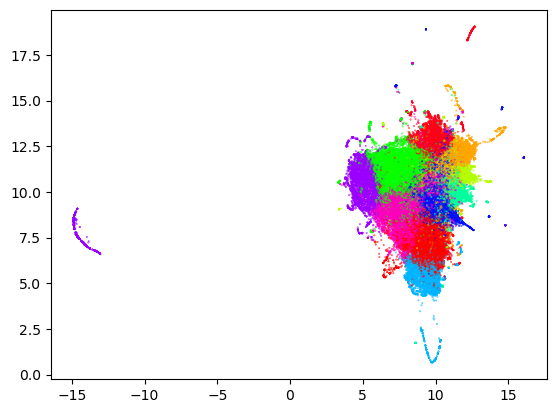

In [35]:
plt.scatter(user_umap_2d[:, 0], user_umap_2d[:, 1], c=kmeans_labels, s=0.1, cmap='hsv');

In [37]:
user_big["cluster"] = kmeans_labels
user_big

,user_id,music,sports,tv,lifestyle,news,finance,entertainment,foodanddrink,health,autos,travel,weather,movies,video,kids,middleeast,median,cluster
0,U100,0.100000,0.200000,0.400000,0.200000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.291667,9
1,U1000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.916667,8
2,U10001,0.000000,0.600000,0.066667,0.066667,0.200000,0.000000,0.000000,0.066667,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.208333,5
3,U10003,0.000000,0.125000,0.000000,0.125000,0.500000,0.000000,0.000000,0.000000,0.125000,0.125,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.437500,3
4,U10008,0.000000,0.043478,0.130435,0.000000,0.478261,0.000000,0.086957,0.043478,0.043478,0.000,0.043478,0.130435,0.000000,0.000000,0.0,0.0,0.583333,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49103,U9993,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.500000,3
49104,U9995,0.029412,0.014706,0.044118,0.205882,0.058824,0.073529,0.000000,0.161765,0.132353,0.000,0.264706,0.000000,0.014706,0.000000,0.0,0.0,0.541667,4
49105,U9996,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.200000,0.200000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333,1
49106,U9997,0.000000,0.000000,0.076923,0.153846,0.000000,0.076923,0.000000,0.692308,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.500000,4


In [38]:
user_big["cluster"].value_counts()

cluster
3    9539
8    6941
0    6691
7    4817
6    4584
9    4375
1    4166
5    3279
4    2585
2    2131
Name: count, dtype: int64

,music,sports,tv,lifestyle,news,finance,entertainment,foodanddrink,health,autos,travel,weather,movies,video,kids,middleeast,median,cluster
count,6691.000000,6691.000000,6691.000000,6691.000000,6691.000000,6691.000000,6691.000000,6691.000000,6691.000000,6691.000000,6691.000000,6691.000000,6691.000000,6691.000000,6691.0,6691.000000,6691.000000,6691.0
mean,0.024413,0.342645,0.065889,0.062038,0.242468,0.056639,0.026030,0.030309,0.028486,0.030866,0.022313,0.011434,0.039570,0.016895,0.0,0.000006,0.363666,0.0
std,0.051266,0.093747,0.077757,0.074321,0.117937,0.073532,0.057231,0.055109,0.052620,0.061593,0.048830,0.038770,0.066567,0.045740,0.0,0.000390,0.125260,0.0
min,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.000000,0.269231,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.291667,0.0
50%,0.000000,0.333333,0.042553,0.041667,0.250000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.375000,0.0
75%,0.030303,0.400000,0.111111,0.100000,0.333333,0.093750,0.029851,0.043478,0.040000,0.037037,0.024691,0.000000,0.060172,0.000000,0.0,0.000000,0.458333,0.0
max,0.750000,0.666667,0.500000,0.500000,0.600000,0.500000,0.666667,0.400000,0.333333,0.409091,0.500000,0.666667,0.750000,0.666667,0.0,0.027778,0.687500,0.0


In [42]:
for i in range(9):
    print("Cluster Group " + str(i))
    print(user_big[user_big["cluster"] == i].describe())


Cluster Group 0
             music       sports           tv    lifestyle         news  \
count  6691.000000  6691.000000  6691.000000  6691.000000  6691.000000   
mean      0.024413     0.342645     0.065889     0.062038     0.242468   
std       0.051266     0.093747     0.077757     0.074321     0.117937   
min       0.000000     0.125000     0.000000     0.000000     0.000000   
25%       0.000000     0.269231     0.000000     0.000000     0.166667   
50%       0.000000     0.333333     0.042553     0.041667     0.250000   
75%       0.030303     0.400000     0.111111     0.100000     0.333333   
max       0.750000     0.666667     0.500000     0.500000     0.600000   

           finance  entertainment  foodanddrink       health        autos  \
count  6691.000000    6691.000000   6691.000000  6691.000000  6691.000000   
mean      0.056639       0.026030      0.030309     0.028486     0.030866   
std       0.073532       0.057231      0.055109     0.052620     0.061593   
min      